In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from imblearn.ensemble import BalancedRandomForestClassifier

In [81]:
df = pd.read_csv("ohtani_stats_new.csv")

In [82]:
df.head()

,pitcher,events,home_team,away_team,pitch_name,release_speed,launch_speed,launch_angle,hit_distance_sc,bb_type,release_pos_x,release_pos_y,zone,p_throws,balls,strikes,outs_when_up,inning
0,543037,field_out,NYY,LAD,Knuckle Curve,83.3,79.1,7.0,102.0,ground_ball,-2.52,54.37,13.0,R,1,1,0,7
1,543037,strikeout,NYY,LAD,Knuckle Curve,87.3,NaN,NaN,NaN,NaN,-2.74,54.10,13.0,R,1,2,1,5
2,543037,field_out,NYY,LAD,Changeup,90.4,88.2,29.0,317.0,fly_ball,-2.77,54.20,13.0,R,0,2,2,3
3,596133,catcher_interf,NYY,LAD,Changeup,89.7,NaN,NaN,NaN,NaN,-1.63,54.56,4.0,R,0,0,1,8
4,543037,field_out,NYY,LAD,4-Seam Fastball,95.6,93.2,45.0,289.0,fly_ball,-2.76,54.32,5.0,R,0,0,0,1


In [83]:
hit_mapping = {
    'single': 1,
    'double': 1,
    'triple': 1,
    'home_run': 1,
    'walk': 1,
}

In [84]:
def get_opponent(row):
    if row['home_team'] == 'LAD':
        return row['away_team']
    else:
        return row['home_team']

In [85]:
df['target'] = df['events'].apply(lambda x: hit_mapping.get(x.lower(), 0))

In [86]:
df['opponent_team'] = df.apply(get_opponent, axis=1)

In [87]:
df.head(50)

,pitcher,events,home_team,away_team,pitch_name,release_speed,launch_speed,launch_angle,hit_distance_sc,bb_type,release_pos_x,release_pos_y,zone,p_throws,balls,strikes,outs_when_up,inning,target,opponent_team
0,543037,field_out,NYY,LAD,Knuckle Curve,83.3,79.1,7.0,102.0,ground_ball,-2.52,54.37,13.0,R,1,1,0,7,0,NYY
1,543037,strikeout,NYY,LAD,Knuckle Curve,87.3,NaN,NaN,NaN,NaN,-2.74,54.10,13.0,R,1,2,1,5,0,NYY
2,543037,field_out,NYY,LAD,Changeup,90.4,88.2,29.0,317.0,fly_ball,-2.77,54.20,13.0,R,0,2,2,3,0,NYY
3,596133,catcher_interf,NYY,LAD,Changeup,89.7,NaN,NaN,NaN,NaN,-1.63,54.56,4.0,R,0,0,1,8,0,NYY
4,543037,field_out,NYY,LAD,4-Seam Fastball,95.6,93.2,45.0,289.0,fly_ball,-2.76,54.32,5.0,R,0,0,0,1,0,NYY
5,661563,field_out,NYY,LAD,Slider,86.6,102.0,30.0,379.0,fly_ball,-2.85,53.95,6.0,R,1,0,0,3,0,NYY
6,643410,strikeout,NYY,LAD,Split-Finger,85.7,NaN,NaN,NaN,NaN,-0.84,53.91,13.0,R,3,2,1,7,0,NYY
7,661563,field_out,NYY,LAD,Slider,87.5,83.9,58.0,173.0,popup,-2.62,53.82,5.0,R,3,2,0,1,0,NYY
8,657612,single,NYY,LAD,Sinker,88.9,103.8,14.0,266.0,line_drive,3.92,53.60,6.0,L,0,0,0,5,1,NYY
9,657376,field_out,NYY,LAD,Sinker,95.9,103.9,-17.0,9.0,ground_ball,-1.23,54.39,4.0,R,2,2,0,3,0,NYY


In [88]:
X = df.drop(columns=['events', 'launch_speed', 'launch_angle', 'hit_distance_sc', 'bb_type','home_team', 'away_team', 'target', 'p_throws'])

In [89]:
le = LabelEncoder()

X['pitch_id'] = le.fit_transform(X['pitch_name'])
X = X.drop(columns=['pitch_name'])

In [90]:
# X

In [91]:
le = LabelEncoder()

X['opponent_team_id'] = le.fit_transform(X['opponent_team'])
X = X.drop(columns=['opponent_team'])

In [92]:
X

,pitcher,release_speed,release_pos_x,release_pos_y,zone,balls,strikes,outs_when_up,inning,pitch_id,opponent_team_id
0,543037,83.3,-2.52,54.37,13.0,1,1,0,7,4,17
1,543037,87.3,-2.74,54.10,13.0,1,2,1,5,4,17
2,543037,90.4,-2.77,54.20,13.0,0,2,2,3,1,17
3,596133,89.7,-1.63,54.56,4.0,0,0,1,8,1,17
4,543037,95.6,-2.76,54.32,5.0,0,0,0,1,0,17
...,...,...,...,...,...,...,...,...,...,...,...
823,663562,NaN,NaN,NaN,NaN,0,0,1,3,11,7
824,596295,NaN,NaN,NaN,NaN,0,0,0,1,11,7
825,595881,NaN,NaN,NaN,NaN,3,0,2,5,11,6
826,471911,NaN,NaN,NaN,NaN,3,0,1,1,11,6


In [93]:
y = df['target']

In [94]:
y

0      0
1      0
2      0
3      0
4      0
      ..
823    1
824    1
825    1
826    1
827    1
Name: target, Length: 828, dtype: int64

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [96]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((662, 11), (662,), (166, 11), (166,))

In [97]:
brf = BalancedRandomForestClassifier(n_estimators=100, random_state=42)
brf.fit(X_train, y_train)

C:\Users\tonyg\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\tonyg\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\tonyg\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


BalancedRandomForestClassifier(random_state=42)

In [98]:
y_pred = brf.predict(X_test)

              precision    recall  f1-score   support

           0       0.74      0.64      0.69       104
           1       0.51      0.61      0.55        62

    accuracy                           0.63       166
   macro avg       0.62      0.63      0.62       166
weighted avg       0.65      0.63      0.64       166



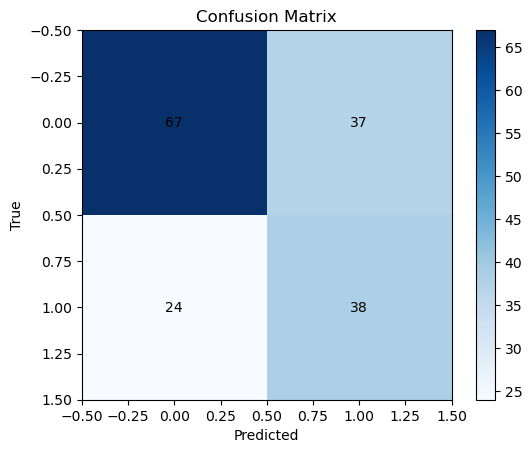

In [99]:
print(classification_report(y_test, y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
fig, ax = plt.subplots()
im = ax.imshow(cm, cmap='Blues')

# Add colorbar
plt.colorbar(im)

# Add labels
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')

# Add numbers on each cell
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black')


In [100]:
team_distribution = df['target'].value_counts()
team_distribution

target
0    517
1    311
Name: count, dtype: int64